Resonant values 2.6782 and 3.0734
Resonant values 2.8092 and 2.9758
Resonant values 2.7441 and 3.0273
Resonant values 2.8672 and 2.9241


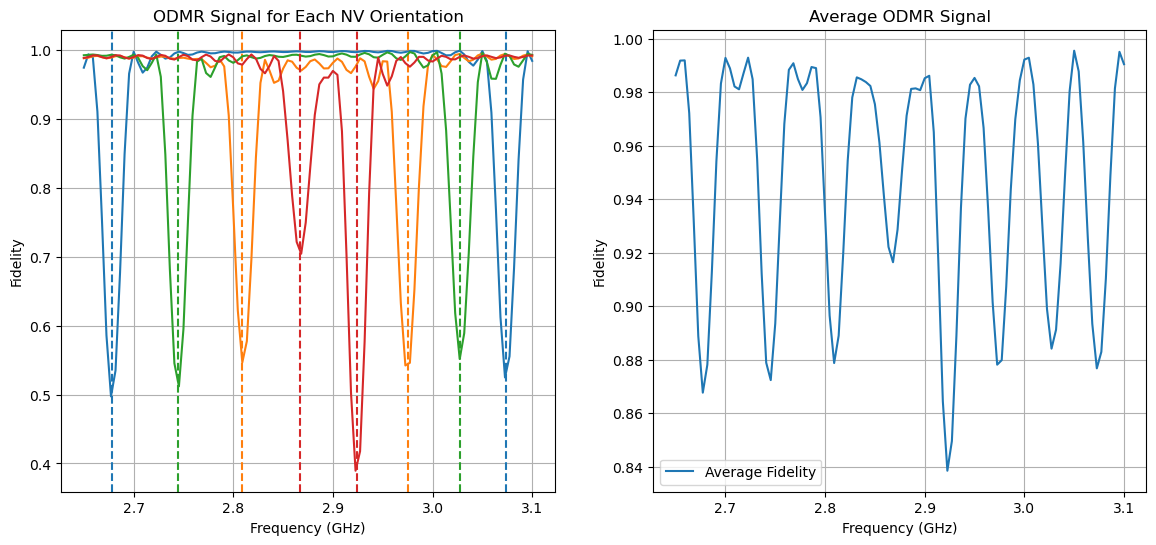

In [102]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectionSlider
from mytoolbox import *
import time

# Constants
D = 2.87  # Zero-field splitting in GHz
g_e = -28.03  # Gyromagnetic ratio of the electron in GHz/T
t = 2*np.pi*11.2*4  # Time for evolution in arbitrary units
n_evolution = 50  # Number of data points for numerical solution
initial_state = qt.basis(3, 1)
evolution_operator = qt.jmat(1, 'x')  # Using Sx as evolution operator

# Frequency range
frequencies = np.linspace(2.65, 3.1, 100)

# NV orientations
nv_orientations = [
    (1, 1, 1),
    (1, -1, -1),
    (-1, 1, -1),
    (-1, -1, 1)
]

# Magnetic field in Cartesian coordinates (example value)
B_field = [3.54 / 1000, 
           1.73 / 1000, 
           6.95 / 1000]  # Tesla

# Pulse amplitude
amp = 0.008

# Precompute fidelities and resonant frequencies for the given magnetic field and orientations
avg_fidelity = np.zeros(len(frequencies))
individual_fidelities = []
resonant_frequencies = []

for orientation in nv_orientations:
    # Calculate the ODMR signal (fidelity)
    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
    individual_fidelities.append(fidelities)
    avg_fidelity += np.array(fidelities)
    
    # Compute the eigenvalues and resonant frequencies
    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
    resonant_frequencies.append((em1 - e0, ep1 - e0))
    print(f'Resonant values {em1 - e0:.4f} and {ep1 - e0:.4f}')

avg_fidelity /= len(nv_orientations)

# Plot the results
plt.figure(figsize=(14, 6))

# Plot individual fidelities with resonant frequencies as dashed lines
plt.subplot(1, 2, 1)
for i, fid in enumerate(individual_fidelities):
    color = plt.plot(frequencies, fid, label=f'Orientation {i + 1}')[0].get_color()
    
    # Add vertical dashed lines for resonant frequencies
    plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
    plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')
    
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('ODMR Signal for Each NV Orientation')
#plt.legend()
plt.grid(True)

# Plot average fidelity
plt.subplot(1, 2, 2)
plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('Average ODMR Signal')
plt.legend()
plt.grid(True)

plt.show()

Resonant values 2.7575 and 2.9976
Resonant values 2.8308 and 2.9364
Resonant values 2.8542 and 2.9150
Resonant values 2.7316 and 3.0172


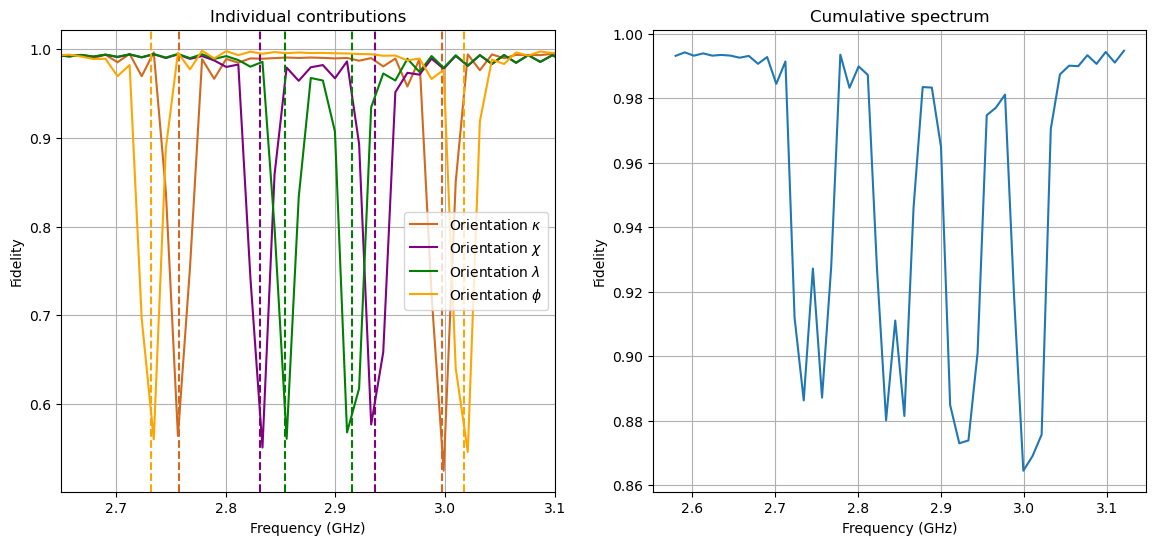

In [121]:
B = 6.06
polar = 45
azimuthal = 20

nv_orientations = [
    (0,0,1),
    (1.58, -0.42, -0.58),
    (-0.42, 1.58, -0.58),
    (-1.15, -1.15, -0.58)
]

Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
Bz = B * np.cos(np.radians(polar))

# Magnetic field in Cartesian coordinates (example value)
B_field = [Bx / 1000, 
           By / 1000, 
           Bz / 1000]  # Tesla

# Pulse amplitude
amp = 0.008

# Frequency range
frequencies = np.linspace(2.58, 3.12, 50)

# Precompute fidelities and resonant frequencies for the given magnetic field and orientations
avg_fidelity = np.zeros(len(frequencies))
individual_fidelities = []
resonant_frequencies = []

for orientation in nv_orientations:
    # Calculate the ODMR signal (fidelity)
    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
    individual_fidelities.append(fidelities)
    avg_fidelity += np.array(fidelities)
    
    # Compute the eigenvalues and resonant frequencies
    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
    resonant_frequencies.append((em1 - e0, ep1 - e0))
    print(f'Resonant values {em1 - e0:.4f} and {ep1 - e0:.4f}')

avg_fidelity /= len(nv_orientations)

# Plot the results
plt.figure(figsize=(14, 6))

orientation_names = ["$\kappa$", "$\phi$", "$\lambda$", "$\chi$"]
orientation_colors = ["chocolate", "green", "red", "purple"]

orientation_names = ["$\kappa$", "$\chi$", "$\lambda$", "$\phi$"]
orientation_colors = ["chocolate", "purple", "green", "orange"]

# Plot individual fidelities with resonant frequencies as dashed lines
plt.subplot(1, 2, 1)
for i, fid in enumerate(individual_fidelities):
    color = orientation_colors[i]
    plt.plot(frequencies, fid, label=f'Orientation {orientation_names[i]}', color=color)
    
    # Add vertical dashed lines for resonant frequencies
    plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
    plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')
    
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.xlim(2.65,3.1)
plt.title('Individual contributions')
plt.legend()
plt.grid(True)

# Plot average fidelity
plt.subplot(1, 2, 2)
plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Fidelity')
plt.title('Cumulative spectrum')
plt.grid(True)

plt.savefig('plots/sim_odmr_comparison.png')

plt.show()

In [122]:
from ipywidgets import interact, SelectionSlider, VBox, HTML

# Define possible values for B (in millitesla), polar and azimuthal angles (in degrees), and amplitude
B_values = [0.1, 1, 2.5, 3.06, 5.53, 7.99, 10, 20]  # B values in millitesla
polar_values = [0, 1, 5, 10, 14.37, 30, 45 ,55, 60, 90, 270]  # Polar angles in degrees
azimuthal_values = [0, 5, 10, 26, 45, 60, 90]  # Azimuthal angles in degrees
amp_values = [0.008]  # Pulse amplitude

nv_orientations = [
    (1, 1, 1),
    (1, -1, -1),
    (-1, 1, -1),
    (-1, -1, 1)
]

# Frequency range
frequencies = np.linspace(2.5, 3.2, 100)

# Precompute fidelities and resonant frequencies for each combination
precomputed_fidelities = {}
for B in B_values:
    for polar in polar_values:
        for azimuthal in azimuthal_values:
            for amp in amp_values:
                Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
                By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
                Bz = B * np.cos(np.radians(polar))
                
                B_field = [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla
                
                avg_fidelity = np.zeros(len(frequencies))
                individual_fidelities = []
                resonant_frequencies = []

                for orientation in nv_orientations:
                    fidelities = odmr_cartesian(D, g_e, B_field, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
                    individual_fidelities.append(fidelities)
                    avg_fidelity += np.array(fidelities)

                    e0, em1, ep1 = compute_eigenvalues(D, g_e, orientation, B_field)
                    resonant_frequencies.append((em1 - e0, ep1 - e0))

                avg_fidelity /= len(nv_orientations)
                precomputed_fidelities[(B, polar, azimuthal, amp)] = (individual_fidelities, avg_fidelity, resonant_frequencies)

# Function to plot the precomputed ODMR spectra based on slider values
def plot_odmr(B, polar, azimuthal, amp):
    key = (B, polar, azimuthal, amp)
    
    if key not in precomputed_fidelities:
        print(f"Combination (B={B}, polar={polar}, azimuthal={azimuthal}, amp={amp}) not precomputed.")
        return
    
    individual_fidelities, avg_fidelity, resonant_frequencies = precomputed_fidelities[key]

    plt.figure(figsize=(14, 6))

    # Plot individual fidelities with resonant frequencies as dashed lines
    plt.subplot(1, 2, 1)
    for i, fid in enumerate(individual_fidelities):
        color = plt.plot(frequencies, fid, label=f'Orientation {i + 1}')[0].get_color()
        plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
        plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')

    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Fidelity')
    plt.title('ODMR Signal for Each NV Orientation')
    plt.grid(True)

    # Plot average fidelity
    plt.subplot(1, 2, 2)
    plt.plot(frequencies, avg_fidelity, label='Average Fidelity')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Fidelity')
    plt.title('Average ODMR Signal')
    plt.legend()
    plt.grid(True)

    plt.show()

    # Create HTML for displaying resonant frequencies
    res_freq_text = "<b>Resonant Frequencies (GHz):</b><br>"
    for i, (f1, f2) in enumerate(resonant_frequencies):
        res_freq_text += f"Orientation {i + 1} frequencies: {f1:.3f}, {f2:.3f}<br>"

    return HTML(res_freq_text)

# Create sliders for B, polar, azimuthal, and amplitude using SelectionSlider
B_slider = SelectionSlider(options=B_values, value=B_values[0], description='B (mT)')
polar_slider = SelectionSlider(options=polar_values, value=polar_values[0], description='Polar (°)')
azimuthal_slider = SelectionSlider(options=azimuthal_values, value=azimuthal_values[0], description='Azimuthal (°)')
amp_slider = SelectionSlider(options=amp_values, value=amp_values[0], description='Amplitude')

# Create interactive plot with sliders
interact(plot_odmr, B=B_slider, polar=polar_slider, azimuthal=azimuthal_slider, amp=amp_slider)

interactive(children=(SelectionSlider(description='B (mT)', options=(0.1, 1, 2.5, 3.06, 5.53, 7.99, 10, 20), v…

<function __main__.plot_odmr(B, polar, azimuthal, amp)>

Ideally: 

2.68 - 3.07

2.86 - 2.93

2.73 - 3.03

2.82 - 2.96

Polar angle 0°: Resonant values 2.5897 and 3.1503
Polar angle 30°: Resonant values 2.6378 and 3.1228
Polar angle 45°: Resonant values 2.6927 and 3.0884
Polar angle 60°: Resonant values 2.7606 and 3.0407
Polar angle 75°: Resonant values 2.8347 and 2.9813
Polar angle 90°: Resonant values 2.8971 and 2.9242


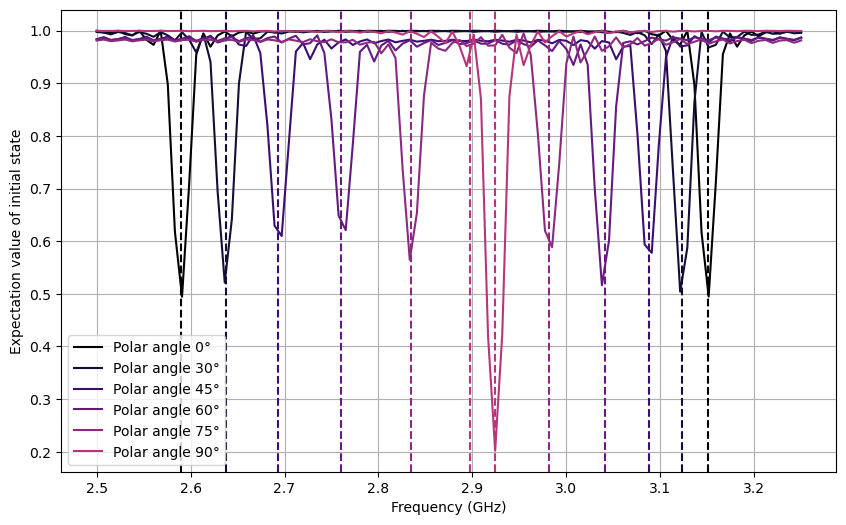

In [105]:
B=10
polar_angles = [0, 30, 45, 60, 75, 90]  # degrees

# Pulse amplitude
amp = 0.008

# Frequencies for ODMR
frequencies = np.linspace(2.5, 3.25, 100)  # Example frequency range in GHz

# NV orientation along z-axis
nv_orientation = [0, 0, 0.1]  # polar=0, azimuthal=0

# Function to compute magnetic field components
def compute_B_field(B, polar, azimuthal):
    Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
    By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
    Bz = B * np.cos(np.radians(polar))
    return [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla

# Precompute fidelities and resonant frequencies for the given magnetic field and orientations
individual_fidelities = []
resonant_frequencies = []

colors = plt.cm.magma(np.linspace(0, 0.7, len(B_values)))

for i, polar in enumerate(polar_angles):
    B_field = compute_B_field(B, polar, 10)  # azimuthal=0
    fidelities = odmr_cartesian(D, g_e, B_field, nv_orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
    individual_fidelities.append(fidelities)
    
    e0, em1, ep1 = compute_eigenvalues(D, g_e, nv_orientation, B_field)
    resonant_frequencies.append((em1 - e0, ep1 - e0))
    print(f'Polar angle {polar}°: Resonant values {em1 - e0:.4f} and {ep1 - e0:.4f}')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot individual fidelities with resonant frequencies as dashed lines
for i, fid in enumerate(individual_fidelities):
    polar = polar_angles[i]
    color = colors[i]
    plt.plot(frequencies, fid, label=f'Polar angle {polar}°', color=color)
    
    # Add vertical dashed lines for resonant frequencies
    plt.axvline(resonant_frequencies[i][0], color=color, linestyle='--')
    plt.axvline(resonant_frequencies[i][1], color=color, linestyle='--')
    
plt.xlabel('Frequency (GHz)')
plt.ylabel('Expectation value of initial state')
plt.grid()
plt.legend()
plt.savefig("plots/sim_single_orientation_angle.png")
plt.show()

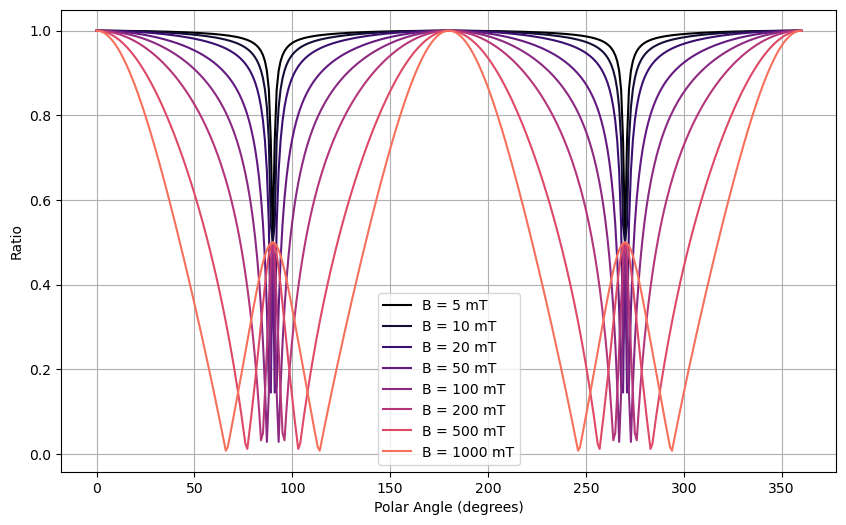

In [106]:
# Magnetic field parameters
B_values = [5, 10, 20, 50, 100, 200, 500, 1000]  # mT
polar_angles = np.arange(0, 361, 1)  # Integer angles between 0 and 360 degrees

# NV orientation along z-axis
nv_orientation = [0, 0, 1]  # polar=0, azimuthal=0

# Function to compute magnetic field components
def compute_B_field(B, polar, azimuthal):
    Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
    By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
    Bz = B * np.cos(np.radians(polar))
    return [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla

plt.figure(figsize=(10, 6))

colors = plt.cm.magma(np.linspace(0, 0.7, len(B_values)))

for i, B in enumerate(B_values):
    ratios = []
    for polar in polar_angles:
        B_field = compute_B_field(B, polar, 0)  # azimuthal=0
        e0, em1, ep1 = compute_eigenvalues(D, 1, nv_orientation, B_field)
        ratio = abs(abs(em1 - e0) - D) / abs(abs(ep1 - e0) - D)
        ratios.append(ratio)
    
    plt.plot(polar_angles, ratios, label=f'B = {B} mT', color=colors[i])

plt.xlabel('Polar Angle (degrees)')
plt.ylabel('Ratio')
plt.grid()
plt.legend()
plt.savefig('plots/sim_ratios_360deg.png')
plt.show()

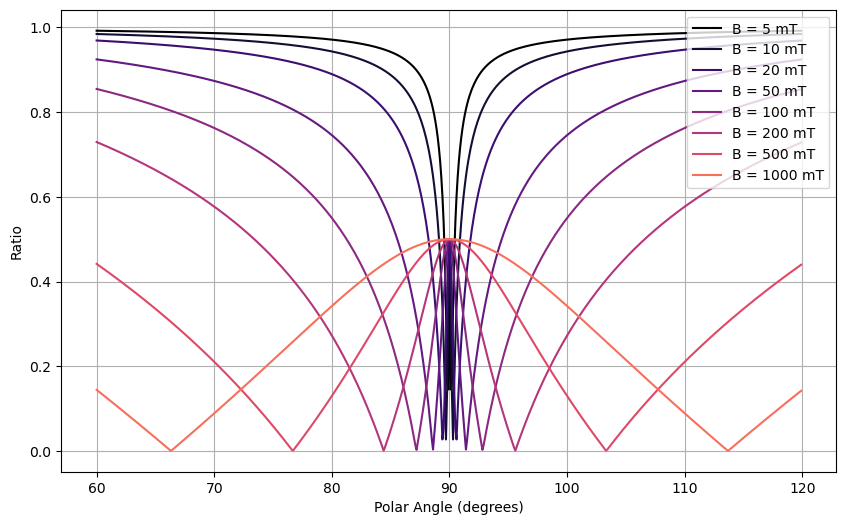

In [107]:
# Magnetic field parameters
B_values = [5, 10, 20, 50, 100, 200, 500, 1000]  # mT
polar_angles = np.arange(60, 120, 0.1)  # Integer angles between 0 and 360 degrees

# NV orientation along z-axis
nv_orientation = [0, 0, 1]  # polar=0, azimuthal=0

# Function to compute magnetic field components
def compute_B_field(B, polar, azimuthal):
    Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
    By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
    Bz = B * np.cos(np.radians(polar))
    return [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla

plt.figure(figsize=(10, 6))

colors = plt.cm.magma(np.linspace(0, 0.7, len(B_values)))

for i, B in enumerate(B_values):
    ratios = []
    for polar in polar_angles:
        B_field = compute_B_field(B, polar, 0)  # azimuthal=0
        e0, em1, ep1 = compute_eigenvalues(D, 1, nv_orientation, B_field)
        ratio = abs(abs(em1 - e0) - D) / abs(abs(ep1 - e0) - D)
        ratios.append(ratio)
    
    plt.plot(polar_angles, ratios, label=f'B = {B} mT', color=colors[i])

plt.xlabel('Polar Angle (degrees)')
plt.ylabel('Ratio')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('plots/sim_ratios_60deg.png')
plt.show()

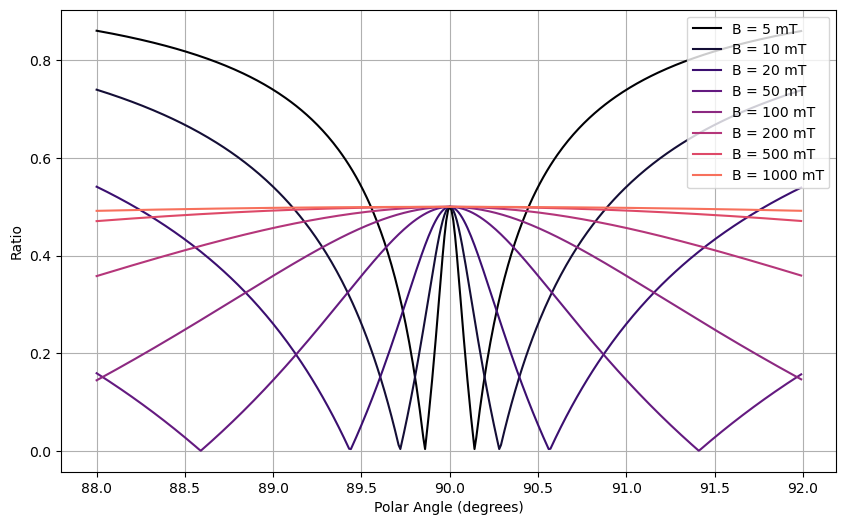

In [108]:
# Magnetic field parameters
B_values = [5, 10, 20, 50, 100, 200, 500, 1000]  # mT
polar_angles = np.arange(88, 92, 0.01)  # Integer angles between 0 and 360 degrees

# NV orientation along z-axis
nv_orientation = [0, 0, 1]  # polar=0, azimuthal=0

# Function to compute magnetic field components
def compute_B_field(B, polar, azimuthal):
    Bx = B * np.sin(np.radians(polar)) * np.cos(np.radians(azimuthal))
    By = B * np.sin(np.radians(polar)) * np.sin(np.radians(azimuthal))
    Bz = B * np.cos(np.radians(polar))
    return [Bx / 1000, By / 1000, Bz / 1000]  # Convert to Tesla

plt.figure(figsize=(10, 6))

colors = plt.cm.magma(np.linspace(0, 0.7, len(B_values)))

for i, B in enumerate(B_values):
    ratios = []
    for polar in polar_angles:
        B_field = compute_B_field(B, polar, 0)  # azimuthal=0
        e0, em1, ep1 = compute_eigenvalues(D, 1, nv_orientation, B_field)
        ratio = abs(abs(em1 - e0) - D) / abs(abs(ep1 - e0) - D)
        ratios.append(ratio)
    
    plt.plot(polar_angles, ratios, label=f'B = {B} mT', color=colors[i])

plt.xlabel('Polar Angle (degrees)')
plt.ylabel('Ratio')
plt.grid()
plt.legend(loc='upper right')
plt.savefig('plots/sim_ratios_4deg.png')
plt.show()